In [17]:
import xarray
import fsspec
import numpy as np
#import s3fs
import proplot
import os

from matplotlib import pyplot as plt
import pandas
import gsw as TEOS_10

In [5]:
#Get list of netcdf files
ran_base_dir = '/oa-decadal-climate/work/observations/CARSv2_ancillary/data_originator/RANCTD'

ran_ctd_files = os.listdir(ran_base_dir)

ran_ctd_files_to_get = []
for i_file in ran_ctd_files:
    
    if os.path.isfile(os.path.join(ran_base_dir,i_file)) and os.path.join(ran_base_dir,i_file).endswith('.nc'):
        ran_ctd_files_to_get.append(os.path.join(ran_base_dir,i_file))

ran_ctd_files_to_get.sort()        

In [7]:
ran_ctd_dataset = xarray.open_dataset(ran_ctd_files_to_get[0])

In [28]:
CODA_to_mnf_key = {'Temperature':'temperature',
                   'Salinity':'salinity',
                   'z':'pressure',
                    'latitude':'latitude',
                   'longitude':'longitude',
                   'time':'time'}  


In [54]:
vars_to_get = ['z','Temperature','Salinity'] #,'latitude','longitude','time']
  
data_container = {}

for i_var in vars_to_get:
    data_container[i_var] = []
    data_container[i_var+'_qc_flag'] = []
    data_container[i_var+'_sd_test'] = []

    

data_container['latitude']  = []
data_container['longitude'] = []
data_container['time']      = []

    
ancillary_vars_to_get = ['origflagset','country','dataset','Access_no','Recorder',
                         'dbase_orig','Platform','Project','WOD_cruise_identifier',
                         'Institute','Ocean_Vehicle']

    
latitudes = []
longitudes = []

FILL_VALUE = -9999

for i_file in ran_ctd_files_to_get:
    #print(i_file)
    ran_ctd_dataset = xarray.open_dataset(i_file)
    
    vars_in_dataset = ran_ctd_dataset.variables.keys()
    for i_var in vars_to_get:
        if CODA_to_mnf_key[i_var] in vars_in_dataset:
            current_profile = ran_ctd_dataset[CODA_to_mnf_key[i_var]].values
        else: 
            current_profile = [np.nan]
            
        data_container[i_var].append(current_profile)
    data_container['latitude'].append(ran_ctd_dataset[CODA_to_mnf_key['latitude']].values)
    data_container['longitude'].append(ran_ctd_dataset[CODA_to_mnf_key['longitude']].values)
    data_container['time'].append(ran_ctd_dataset[CODA_to_mnf_key['time']].values)

    data_container['z'][-1] = TEOS_10.z_from_p(data_container['z'][-1],data_container['latitude'][-1])

    ran_ctd_dataset.close()
    

In [51]:
data_container['latitude'][-1]

IndexError: list index out of range

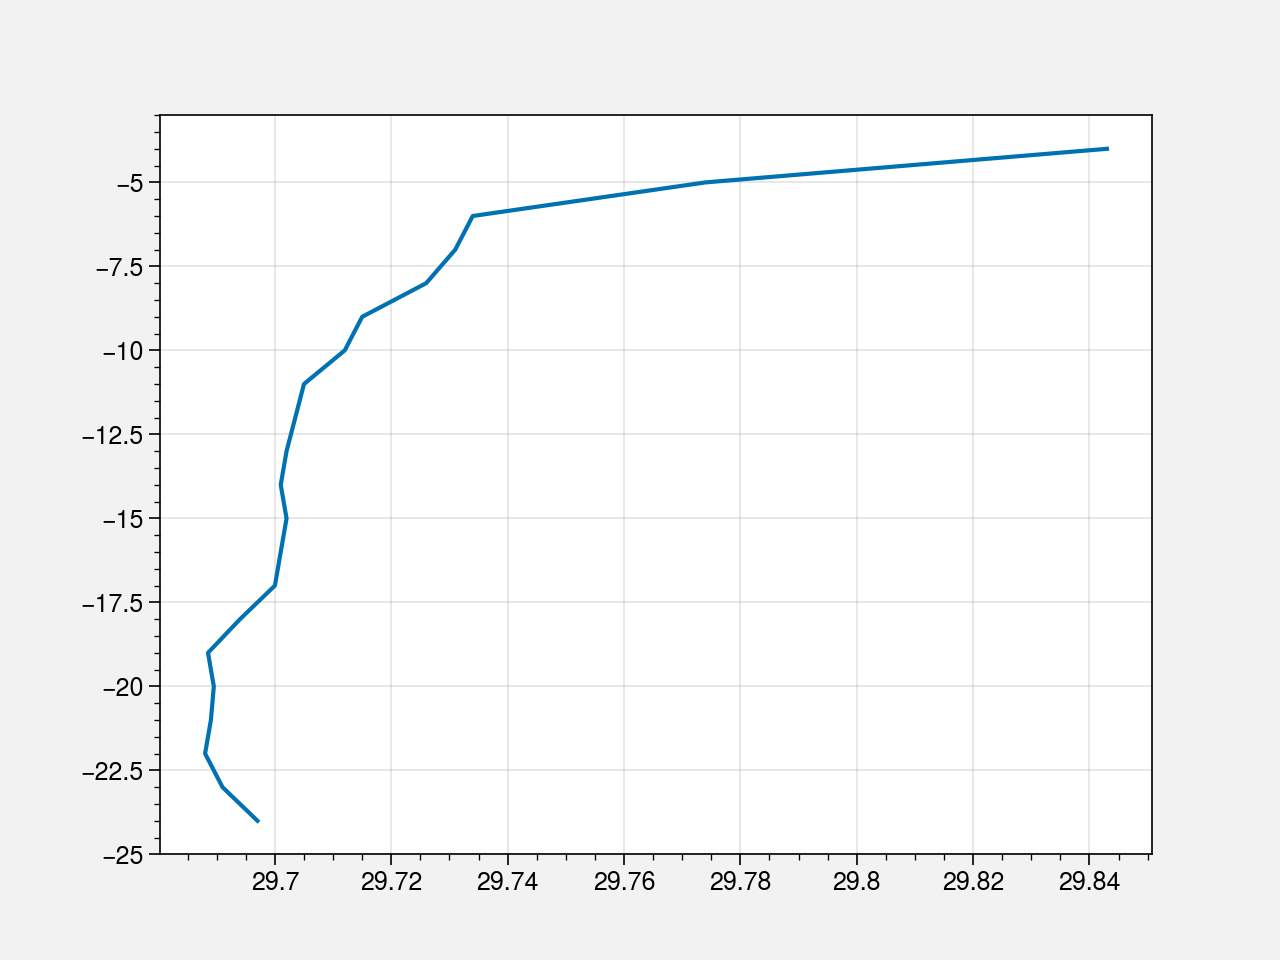

In [47]:
i_cast = 4000
plt.plot(data_container['Temperature'][i_cast],-data_container['z'][i_cast])

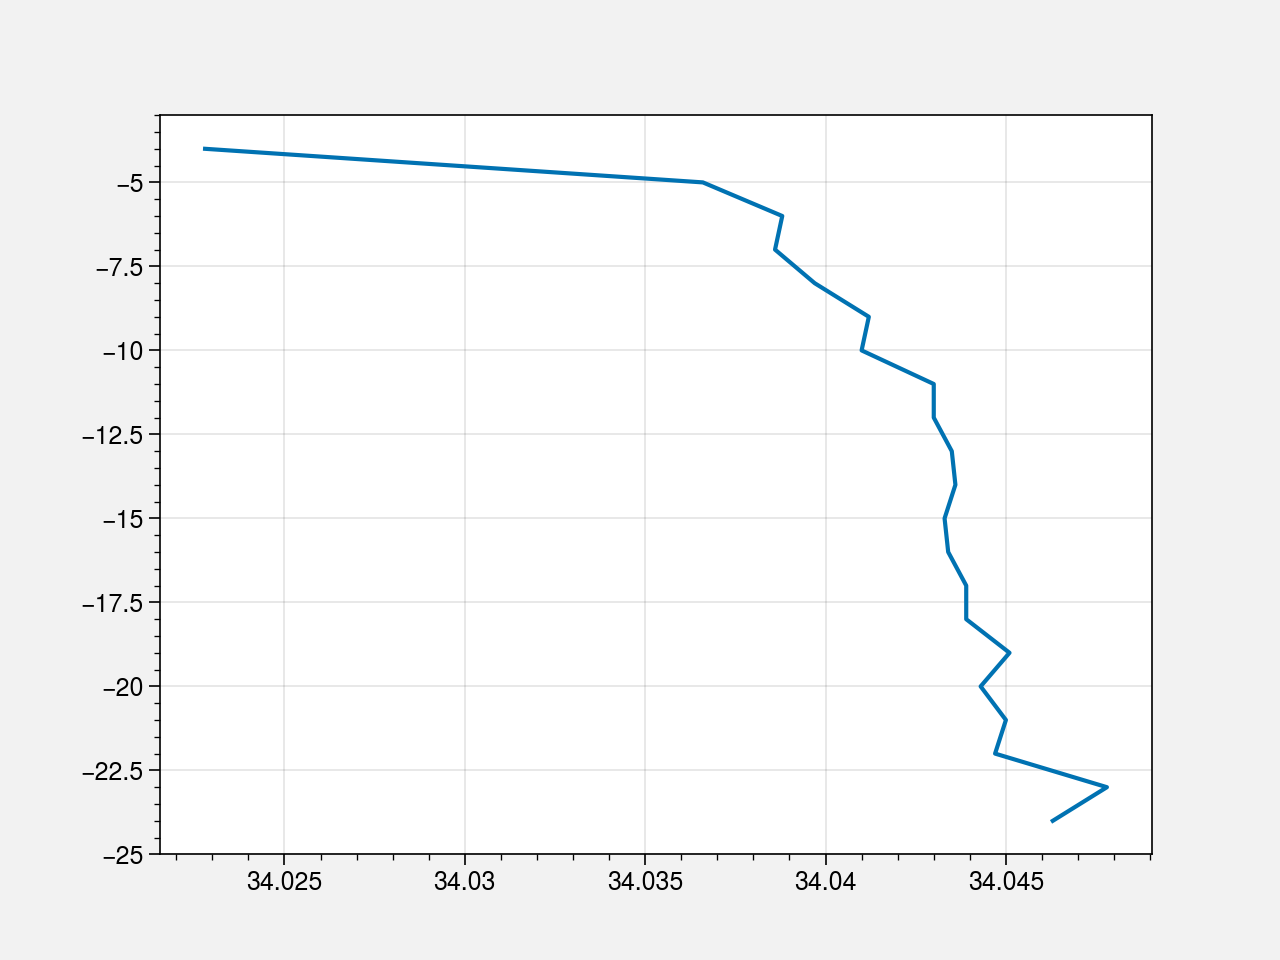

In [48]:
i_cast = 4000
plt.plot(data_container['Salinity'][i_cast],-data_container['z'][i_cast])